In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')
data

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,...,18.947452,61.376610,0,0,1,1,0,0,0,0
14834,14834,62.568425,2.642734,1.446898,1.446898,0.879497,0.879497,0.174620,0.000000,0.000000,...,0.000000,10.000000,0,0,0,1,0,1,0,0
14835,14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,...,0.000000,66.666667,0,0,1,1,0,0,0,0
14836,14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,...,9.088795,45.583333,0,0,0,1,1,0,0,0


In [4]:
test_data = pd.read_csv('/kaggle/input/playground-series-s3e18/test.csv')
test_data

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,24726,246.422865,4.036581,2.816709,2.816709,1.875634,1.875634,1.235986,0.362743,24.146543,...,11.938611,0.000000,0.000000,0.000000,11.938611,12.207933,9.589074,30.000000,2,2
9889,24727,591.069706,8.770857,5.682461,5.682461,4.050440,4.050440,2.167855,1.770579,0.000000,...,0.000000,18.199101,37.107112,17.696186,10.969244,0.000000,0.000000,53.166667,0,0
9890,24728,378.113435,6.310349,3.402334,4.317724,2.817428,4.071978,1.970236,1.165747,36.705949,...,7.822697,0.000000,0.000000,0.000000,7.822697,24.099010,4.736863,50.652870,0,0
9891,24729,737.653518,9.949161,7.337949,7.337949,4.428511,5.948361,3.972459,2.160881,36.992053,...,0.000000,0.000000,0.000000,6.196844,0.000000,12.462662,9.589074,50.250000,0,0


In [41]:
data = data.drop(labels = ['id','EC3','EC4','EC5','EC6'],axis = 1)

/tmp/ipykernel_33/3954721728.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (2,4))


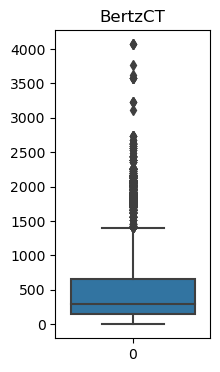

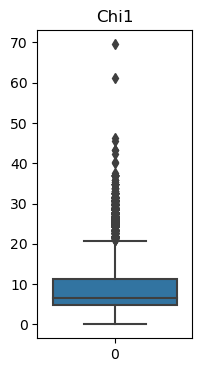

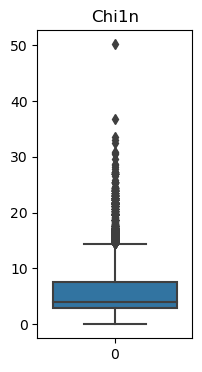

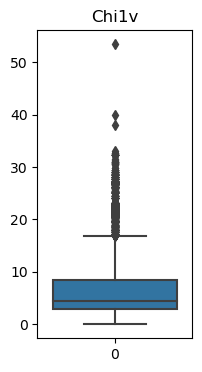

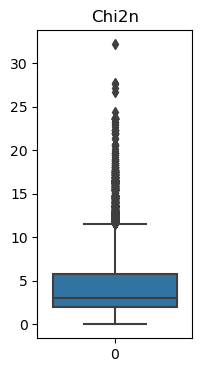

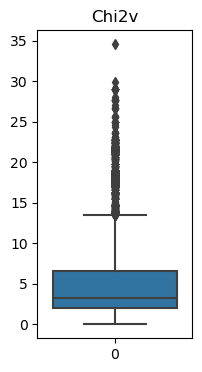

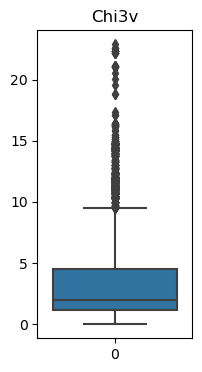

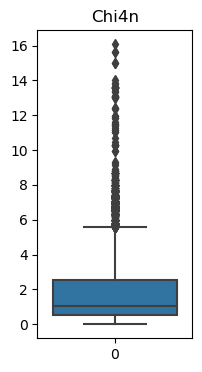

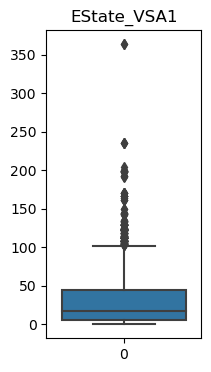

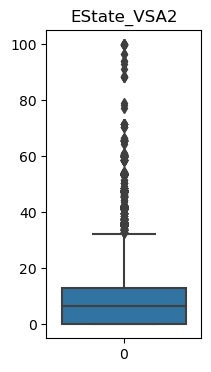

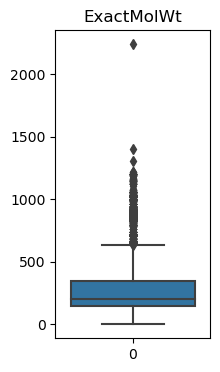

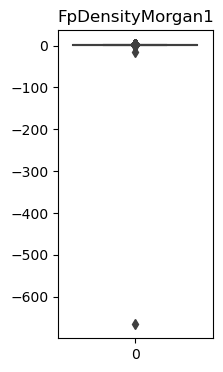

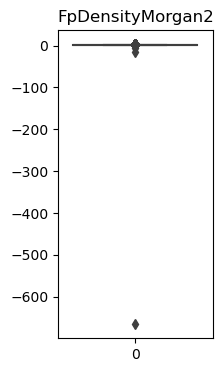

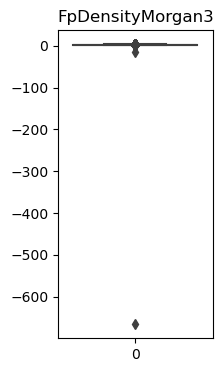

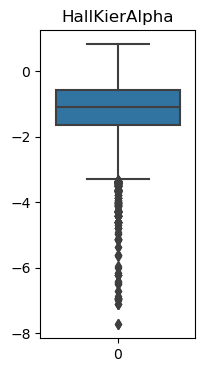

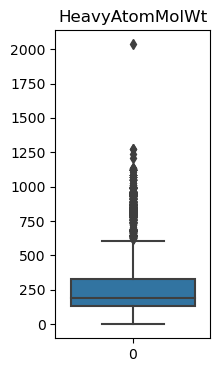

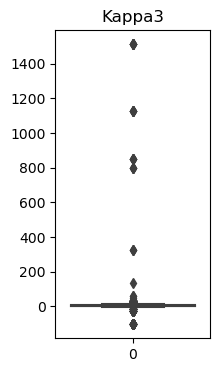

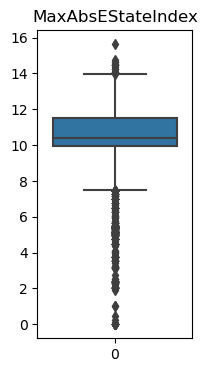

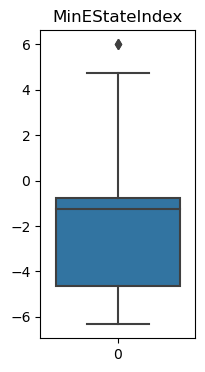

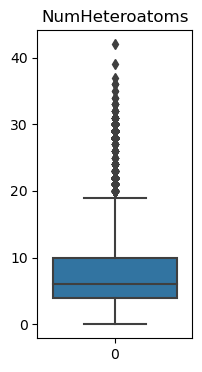

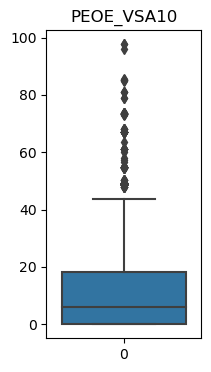

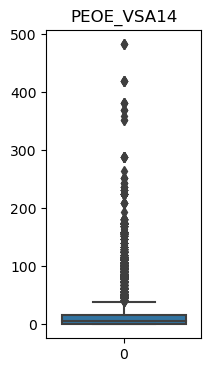

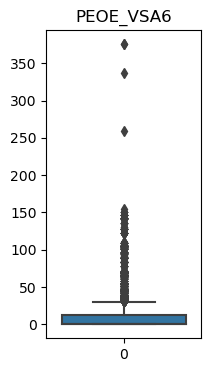

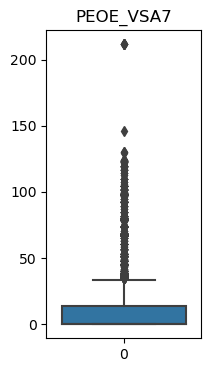

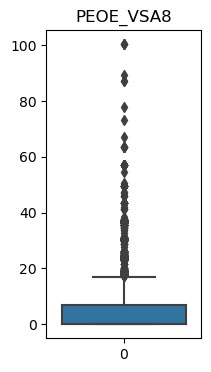

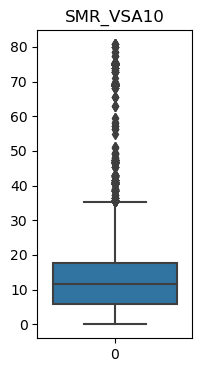

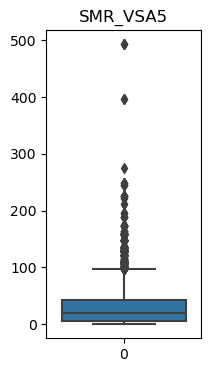

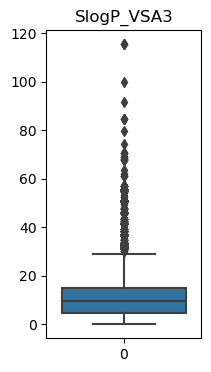

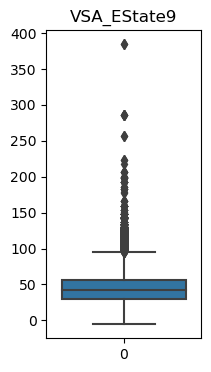

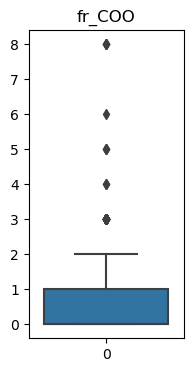

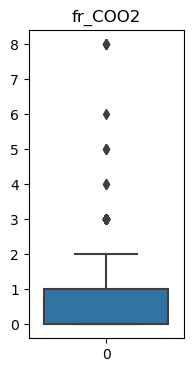

In [6]:
for feat in data.columns :
    if feat == 'EC1' or feat == 'EC2':
        continue
    
    plt.figure(figsize = (2,4))
    plt.title(f'{feat}')
    sns.boxplot(data[feat])
    plt.plot()

In [42]:
features = [x for x in data.columns]

features.remove('EC1')
features.remove('EC2')

target = ['EC1','EC2']
X_data = data[features]
y_data = data[target]

In [43]:
from sklearn.feature_selection import SelectPercentile

**Selecting Best Features**

In [44]:
# For EC1
selector = SelectPercentile(percentile = 40)
X_vt_ec1 = selector.fit_transform(X_data,y_data['EC1'])
X_ec1_mask = selector.get_support()
X_ec1_cols = X_data.columns[X_ec1_mask]
X_ec1 = X_data[X_ec1_cols]


In [45]:
X_ec1.columns

Index(['EState_VSA1', 'ExactMolWt', 'HeavyAtomMolWt', 'MaxAbsEStateIndex',
       'MinEStateIndex', 'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14',
       'PEOE_VSA6', 'PEOE_VSA7', 'SlogP_VSA3', 'VSA_EState9'],
      dtype='object')

In [46]:
# For EC2
selector = SelectPercentile(percentile = 40)
X_vt_ec2 = selector.fit_transform(X_data,y_data['EC2'])
X_ec2_mask = selector.get_support()
X_ec2_cols = X_data.columns[X_ec2_mask]
X_ec2 = X_data[X_ec2_cols]

In [47]:
X_ec2.columns

Index(['EState_VSA2', 'HallKierAlpha', 'MaxAbsEStateIndex', 'PEOE_VSA6',
       'PEOE_VSA7', 'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3',
       'VSA_EState9', 'fr_COO', 'fr_COO2'],
      dtype='object')

In [48]:
ec1 = pd.DataFrame()
ec1[X_ec1.columns] = X_ec1[X_ec1.columns]
ec1['EC1'] = y_data['EC1']

In [49]:
ec2 = pd.DataFrame()
ec2[X_ec2.columns] = X_ec2[X_ec2.columns]
ec2['EC2'] = y_data['EC2']

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler_ec1 = MinMaxScaler()
scaler_ec2 = MinMaxScaler()
X_ec1_std = scaler_ec1.fit_transform(X_ec1)
ec1_std = pd.DataFrame()
ec1_std[X_ec1.columns] = X_ec1_std
ec1_std['EC1'] = ec1['EC1']

In [52]:
X_ec2_std = scaler_ec2.fit_transform(X_ec2)
ec2_std = pd.DataFrame()
ec2_std[X_ec2.columns] = X_ec2_std
ec2_std['EC2'] = ec2['EC2']

In [53]:
!pip install pycaret

In [54]:
from pycaret.classification import *

In [55]:
#clf1 = setup(data = ec1_std , target = 'EC1')
#best1 = compare_models(sort = 'F1')

In [56]:
#clf2 = setup(data = ec2_std , target = 'EC2')
#best2 = compare_models(sort = 'F1')

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train_ec1,X_test_ec1,y_train_ec1,y_test_ec1 = train_test_split(X_ec1_std,y_data['EC1'])

In [59]:
X_train_ec2,X_test_ec2,y_train_ec2,y_test_ec2 = train_test_split(X_ec2_std,y_data['EC2'])

In [60]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [61]:
m1_ec1 = GradientBoostingClassifier()
m2_ec1 = SVC(kernel = 'linear')
m3_ec1 = DummyClassifier(strategy="most_frequent")
mec1 = VotingClassifier(estimators = [('GBC',m1_ec1),('SVC',m2_ec1),('DC',m3_ec1)],voting = 'hard')

In [62]:
m1_ec2 = LogisticRegression()
m2_ec2 = SVC(kernel = 'linear')
m3_ec2 = DummyClassifier(strategy="most_frequent")
mec2 = VotingClassifier(estimators = [('LR',m1_ec2),('SVC',m2_ec2),('DC',m3_ec2)],voting = 'hard')

In [63]:
mec1.fit(X_train_ec1,y_train_ec1)

VotingClassifier(estimators=[('GBC',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='log_loss',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=None,
                                                         random_state=None,
                                                         sub...
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('DC',
                              DummyClassifier(constant=None, random_state=None,
                                              strategy='most_frequent'))],
                 flatten_transform=True, n_jobs=None, verbose=False,
                 voting='hard', weights=None)

In [64]:
mec2.fit(X_train_ec2,y_train_ec2)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVC',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('DC',
                              DummyClassifier(constant=None, random_state=None,
                                              strategy='most_frequent'))],
                 flatten_transform=True, n_jobs=None, verbose=False,
                 voting='hard', weights=None)

In [84]:
from sklearn.metrics import f1_score,hamming_loss

In [85]:
hamming_loss(y_test_ec1,mec1.predict(X_test_ec1))

0.34150943396226413

In [86]:
hamming_loss(y_test_ec2,mec2.predict(X_test_ec2))

0.19649595687331536

**Submission**

In [68]:
test_data

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,24726,246.422865,4.036581,2.816709,2.816709,1.875634,1.875634,1.235986,0.362743,24.146543,...,11.938611,0.000000,0.000000,0.000000,11.938611,12.207933,9.589074,30.000000,2,2
9889,24727,591.069706,8.770857,5.682461,5.682461,4.050440,4.050440,2.167855,1.770579,0.000000,...,0.000000,18.199101,37.107112,17.696186,10.969244,0.000000,0.000000,53.166667,0,0
9890,24728,378.113435,6.310349,3.402334,4.317724,2.817428,4.071978,1.970236,1.165747,36.705949,...,7.822697,0.000000,0.000000,0.000000,7.822697,24.099010,4.736863,50.652870,0,0
9891,24729,737.653518,9.949161,7.337949,7.337949,4.428511,5.948361,3.972459,2.160881,36.992053,...,0.000000,0.000000,0.000000,6.196844,0.000000,12.462662,9.589074,50.250000,0,0


In [87]:
X_ec1_sub = test_data[X_ec1.columns]
X_ec2_sub = test_data[X_ec2.columns]

X_ec1_sub_std = scaler_ec1.fit_transform(X_ec1_sub)
X_ec2_sub_std = scaler_ec2.fit_transform(X_ec2_sub)

In [88]:
pred_ec1 = mec1.predict(X_ec1_sub_std)
pred_ec2 = mec2.predict(X_ec2_sub_std)

In [89]:
pred_ec1.shape

(9893,)

In [90]:
pred_ec2.shape

(9893,)

In [91]:
test_data.shape

(9893, 32)

In [92]:
Submission = pd.DataFrame()
Submission['id'] = test_data['id']
Submission['EC1'] = pred_ec1
Submission['EC2'] = pred_ec2

In [93]:
Submission

,id,EC1,EC2
0,14838,1,1
1,14839,1,1
2,14840,1,1
3,14841,1,1
4,14842,1,1
...,...,...,...
9888,24726,1,1
9889,24727,1,1
9890,24728,1,1
9891,24729,1,1


In [96]:
Submission.to_csv('Sub_.csv',index = False)